In [11]:
import warnings

import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib


warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv('data.csv')
df.head(3)

,yield,group
0,7,0
1,13,0
2,13,0


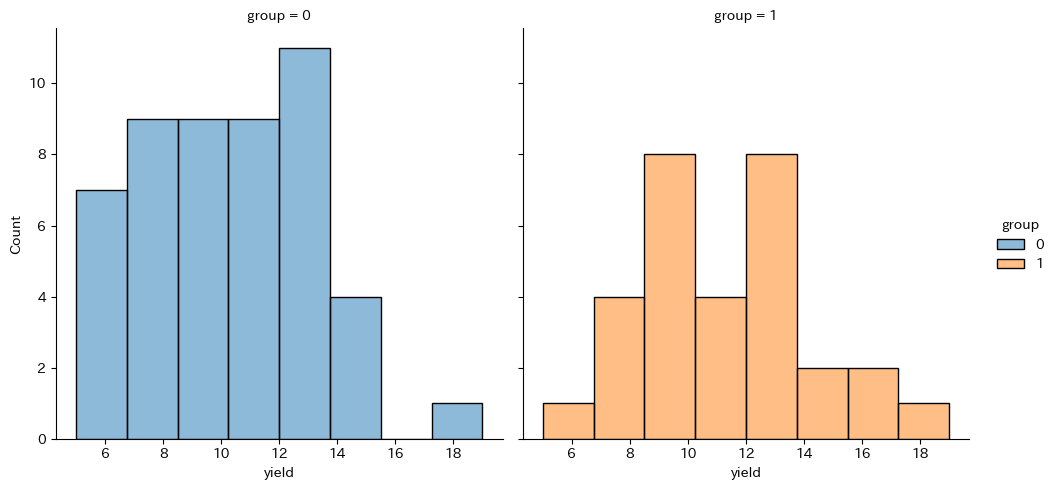

In [19]:
sns.displot(x='yield', hue='group', data=df, col='group')
plt.show()

In [21]:
df.groupby('group').mean()

,yield
group,
0,10.160000
1,11.266667


In [36]:
model = pm.Model()

with model:
    model.add_coord('Group', values=df['group'].unique(), mutable=True)
    model.add_coord('Data', values=df.index, mutable=True)

    X = pm.ConstantData('X', df['yield'].values, dims='Data')
    group = pm.ConstantData('group', df['group'].values, dims='Data')

    mu = pm.HalfNormal('μ', sigma=10, dims='Group')
    obs = pm.Poisson('obs', mu=mu[group], observed=X, dims='Data')

model

  μ ~ HalfNormal(0, 10)
obs ~ Poisson(f(μ))

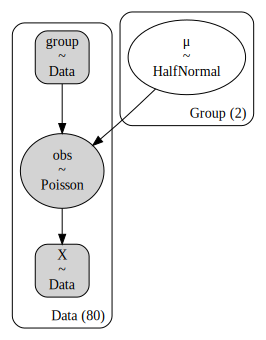

In [37]:
pm.model_to_graphviz(model)

In [41]:
with model:
    iter = pm.sample(3000, tune=1000)
    iter.extend(pm.sample_posterior_predictive(iter, random_seed=8931))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [μ]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 2 seconds.
Sampling: [obs]


Output()

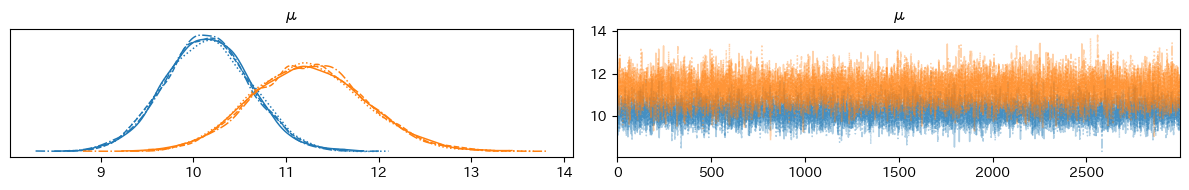

In [42]:
az.plot_trace(iter)
plt.tight_layout()
plt.show()

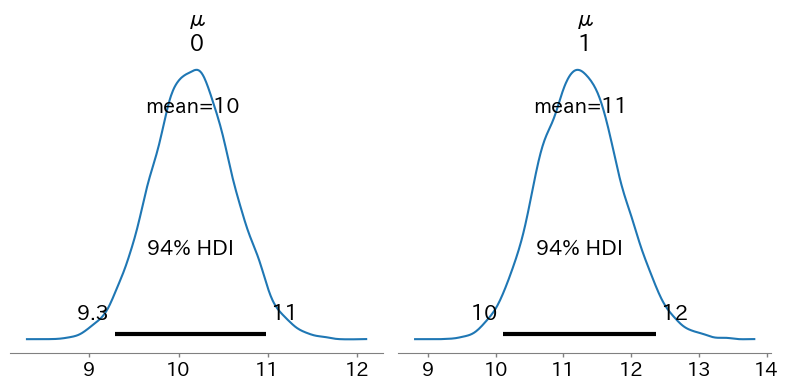

In [101]:
az.plot_posterior(iter, figsize=(8, 4))
plt.tight_layout()
plt.show()

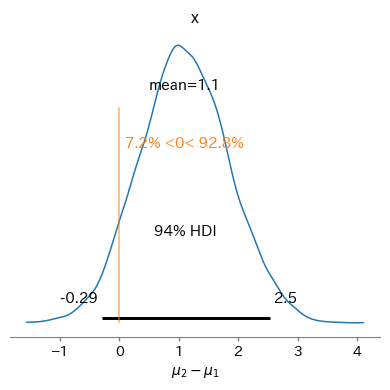

In [102]:
mu_1 = iter.posterior['μ'].T[0].values.flatten()
mu_2 = iter.posterior['μ'].T[1].values.flatten()

az.plot_posterior(mu_2 - mu_1, ref_val=0, figsize=(4, 4))
plt.xlabel('$μ_2 - μ_1$')
plt.tight_layout()
plt.show()